<a href="https://colab.research.google.com/github/aryanfaghihi/ai-course/blob/master/Image%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
# import the required packages
from fastai.vision import *
from fastai.metrics import error_rate
from google.colab import files

# black and white images
defaults.cmap='binary'

# Data

Today we will be training a Deep Learning model capable of classifying numbers! 

Below is a subset of our dataset that we will be training on our model on.


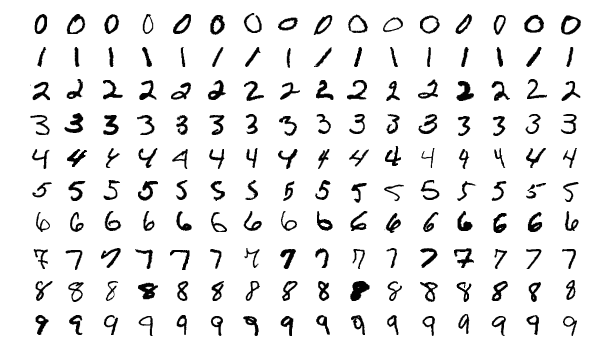


> At the end of this session you will be able to draw a single digit on *Google Drawings* and the modeel will be able to predict what that digit is. 

## Look at data

As always, we start by downloading the dataset.

In [32]:
# Download MNIST dataset
path = untar_data(URLs.MNIST)

Unlike previously when we printed our dataframe and plotted each column, here with images we don't have to do those things. All we do is to create our dataloader and to make sure that it looks good. 

Of course, there are a set of preprocessing that can also be done with image data such as `augmentation` which we will discuss later today.

In [33]:
# Load data to fastai
data = ImageDataBunch.from_folder(path, train='training', valid='testing')

---

Use the `show_batch()` method to view a subset of the data.

---

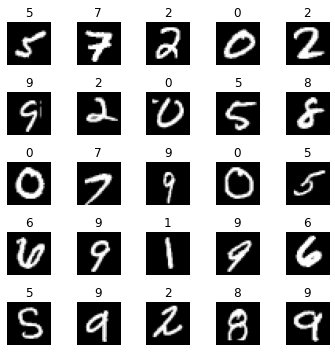

In [34]:
# view a batch of images
data.show_batch(figsize=(5,5))

# Hint: you might want to pass in figsize=(5,5) as an option to 
#       reduce the size of the output image

# Model

Time to train our model! Yes, we are actually ready to train our very first **classifier** (this the technical term for a Deep Learning model that classifies an image).

## Training

Here's where we define our model architecture

In [35]:
# define the model architecture
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

What is `cnn_learner`
> CNN stands for Convolutional Neural Netowrk (sounds fancy right?) but really all its doing is detecting little features in your image. What are features? they could be as simple as a straight line or as complex as a car. The idea is that these *feature detectors* detect relevant features/patterns in our images so that later we can *classify* them more easily.

What is `models.resnet18`?
> Usually you would have to define the architecture (nuts and bolts) of your model. But for most common cases, we can steal someone else's architecture that has worked really well in competitions. `resnet18` is the perfect example of such network. It is the go-to default architecture for image data. Of course, you can change this architecture but I can promise you, for the vast majority of your applications, it is going to work just fine.

In [64]:
learn.fit(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.205388,0.112195,0.964800,00:30
1,0.157536,0.083404,0.972500,00:30
2,0.111131,0.066678,0.979500,00:30


## Testing

In [83]:
# upload a new image
uploaded = files.upload()

# grab the name of the uploaded image
filename = list(uploaded)[0]

Saving mate.jpg to mate (4).jpg


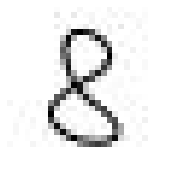

In [92]:
# open the image
image = open_image(filename)

# view the image
show_image(image);

In [85]:
# predict the image!
learn.predict(image)

(Category tensor(8),
 tensor(8),
 tensor([1.5000e-06, 1.1284e-06, 3.8942e-08, 6.4898e-06, 8.1302e-09, 3.3592e-09,
         4.8641e-09, 2.5679e-10, 9.9999e-01, 9.6561e-09]))

## Interpretation

In [86]:
# initialise the classification interpretation class
interp = ClassificationInterpretation.from_learner(learn)

### Top losses

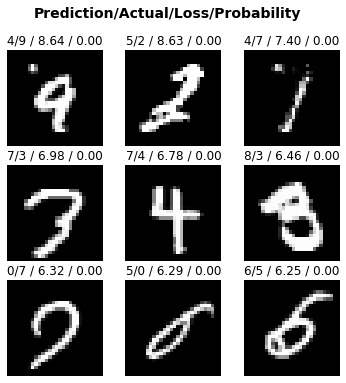

In [87]:
# view the top losses
interp.plot_top_losses(9, figsize=(6,6))

### Confusion matrix

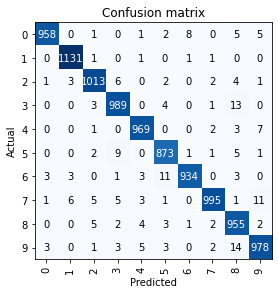

In [93]:
interp.plot_confusion_matrix()